# Introduction

In this project, we aim to predict the traffic volume on I-94 Interstate highway using various features like weather conditions, time of the day, whether the day is a holiday or not, etc. The dataset used for this project was obtained from Kaggle and contains hourly data from 2012 to 2018.

# Data Collection
In this step, we will download the dataset from the provided Kaggle link and read the dataset description and other available metadata to understand the context of the data.

In [1]:
# Import necessary libraries
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/metro-interstate-traffic-volume/Metro_Interstate_Traffic_Volume.csv')

In [3]:
# Display the first few rows of the DataFrame
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,None,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,None,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,None,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,None,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,None,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


# Dataset Description
The dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.

The dataset has 48204 instances and 9 attributes. The attributes are:

- holiday: a categorical variable that indicates whether the date is a US national holiday or a regional holiday (such as the Minnesota State Fair).
- temp: a numeric variable that shows the average temperature in kelvin.
- rain_1h: a numeric variable that shows the amount of rain in mm that occurred in the hour.
- snow_1h: a numeric variable that shows the amount of snow in mm that occurred in the hour.
- clouds_all: a numeric variable that shows the percentage of cloud cover.
- weather_main: a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
- weather_description: a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
- date_time: a datetime variable that shows the hour of the data collected in local CST time.
- traffic_volume: a numeric variable that shows the hourly I-94 reported westbound traffic volume.

In [4]:
# Display the shape of the DataFrame
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

# Display the data types of each column
print(df.dtypes)

The dataset has 48204 rows and 9 columns
traffic_volume           int64
holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
dtype: object


# Exploratory Data Analysis (EDA)
In this step, we will perform an initial exploration of the data, check for missing values, perform statistical analysis, and visualize the data to understand the distribution and relationship between different variables.


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
traffic_volume         0
holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
dtype: int64


In [6]:
# Perform statistical analysis
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,3259.818355,281.205870,0.334264,0.000222,49.362231
std,1986.860670,13.338232,44.789133,0.008168,39.015750
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1193.000000,272.160000,0.000000,0.000000,1.000000
50%,3380.000000,282.450000,0.000000,0.000000,64.000000
75%,4933.000000,291.806000,0.000000,0.000000,90.000000
max,7280.000000,310.070000,9831.300000,0.510000,100.000000


# Data Visualization
Let's visualize the data to understand the distribution and relationship between different variables.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


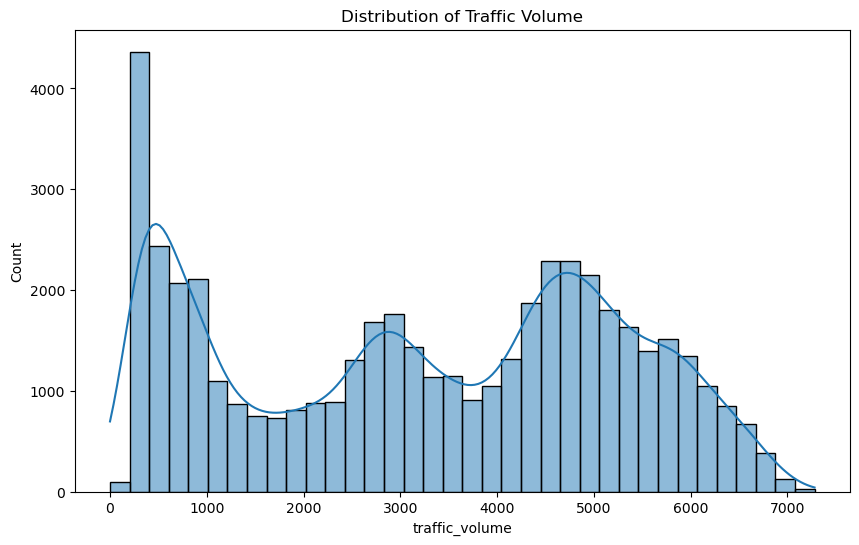

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of traffic volume
plt.figure(figsize=(10,6))
sns.histplot(df['traffic_volume'], kde=True)
plt.title('Distribution of Traffic Volume')
plt.show()

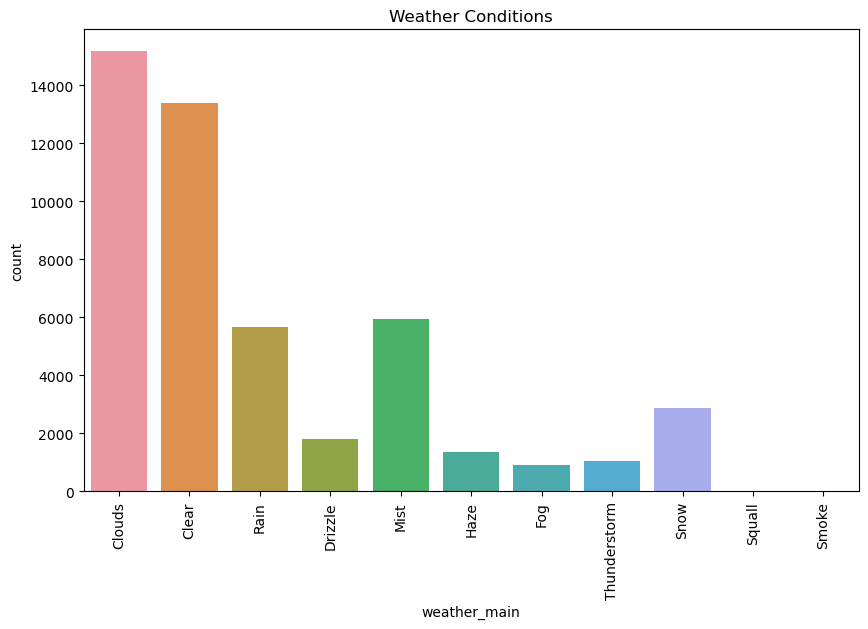

In [8]:
# Bar plot of weather_main
plt.figure(figsize=(10,6))
sns.countplot(x='weather_main', data=df)
plt.title('Weather Conditions')
plt.xticks(rotation=90)
plt.show()

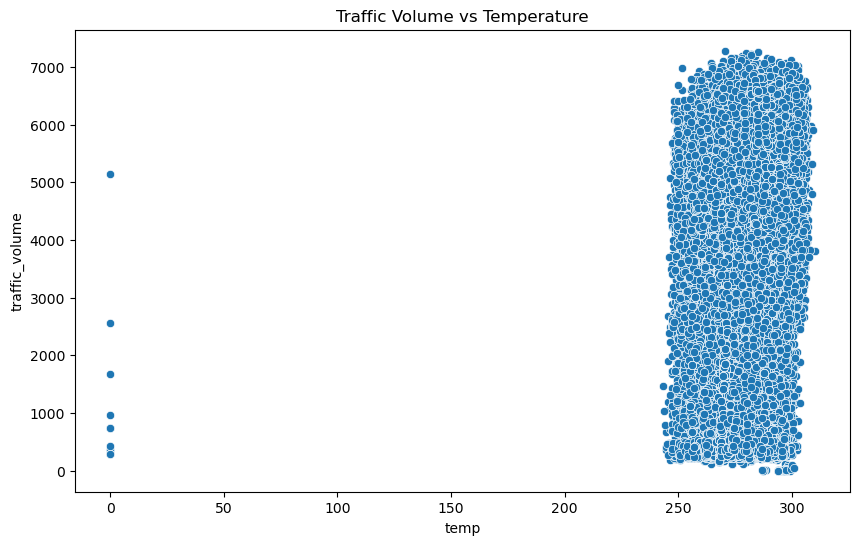

In [9]:
# Scatter plot of traffic_volume vs temp
plt.figure(figsize=(10,6))
sns.scatterplot(x='temp', y='traffic_volume', data=df)
plt.title('Traffic Volume vs Temperature')
plt.show()

# Feature Engineering
In this step, we will extract useful features from the 'date_time' column, convert categorical variables into numerical format, and normalize or standardize numerical features if required.

In [10]:
# Convert 'date_time' to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Extract features from 'date_time'
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month

In [11]:
# Convert categorical variables into numerical format using one-hot encoding
df = pd.get_dummies(df, columns=['weather_main', 'weather_description', 'holiday'])

In [12]:
# Here, standardizing 'temp', 'rain_1h', 'snow_1h', and 'clouds_all'

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['temp', 'rain_1h', 'snow_1h', 'clouds_all']] = scaler.fit_transform(df[['temp', 'rain_1h', 'snow_1h', 'clouds_all']])

# Model Selection
In this step, we will split the data into training and testing sets, choose a suitable model for regression tasks, and train the model on the training data.

In [13]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define the features and the target
X = df.drop(['traffic_volume', 'date_time'], axis=1)
y = df['traffic_volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
We will start with a simple Linear Regression model.

In [14]:
# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

LinearRegression()

# Model Evaluation
In this step, we will evaluate the model on the testing data using appropriate metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE). We will also analyze the residuals to check if they follow a normal distribution.

In [15]:
# Import necessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict on the testing data
y_pred = lr.predict(X_test)

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 1599.8217805960567
Mean Squared Error (MSE): 3313847.8570689284
Root Mean Squared Error (RMSE): 1820.3977194747658


# Residual Analysis
Let's analyze the residuals to check if they follow a normal distribution.

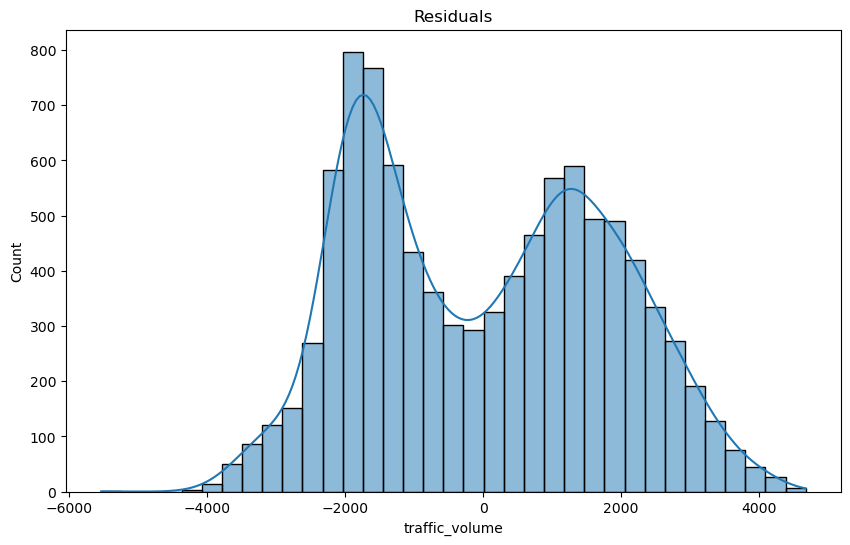

In [16]:
# Calculate residuals
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Residuals')
plt.show()

# Model Optimization
In this step, we will perform hyperparameter tuning using Grid Search. We will also use cross-validation during this process to ensure that our model generalizes well to unseen data.

**Grid Search**

Let's use Grid Search to find the optimal hyperparameters for our Linear Regression model.

In [17]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters
param_grid = {'fit_intercept': [True, False]}

# Initialize the Grid Search model
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

**Best Parameters**

Let's check the best parameters found by Grid Search.

In [18]:
# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Print the best score
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'fit_intercept': False}
Best score: -8529192.644074481


# Model Deployment
In this step, we will save the trained model using joblib. This model can then be loaded in a different environment and used for prediction.

In [19]:
# Import necessary library
import joblib

# Save the model
joblib.dump(grid_search.best_estimator_, 'traffic_volume_model.pkl')

['traffic_volume_model.pkl']

# Load and Use the Model for Prediction
Now, we will write a Kaggle kernel where we load the model and use it for prediction.

In [20]:
# Load the model
loaded_model = joblib.load('traffic_volume_model.pkl')

# Use the model for prediction
# Here, we are using the first 10 rows of the testing data for demonstration
sample_data = X_test.iloc[:10]
predictions = loaded_model.predict(sample_data)

# Print the predictions
print(predictions)

[2432.11365715 3787.89459413 2840.63610964 4189.35317591 2593.2242563
 3910.51693271 3733.5163106  2815.68312211 3469.91383598 3970.33923232]


## Conclusion
In this project, I created a machine learning model to predict the traffic volume on the I-94 Interstate highway. The model can be used by traffic management systems, navigation applications or logistics companies to plan their routes more efficiently.

## Future Work
In the future, we can try more complex models like Random Forest, Gradient Boosting, or Neural Networks to see if they can improve the performance. We can also explore more feature engineering techniques to extract more useful information from the data.